# FlameStream workers scalability comparision

In [4]:
require(data.table)

Loading required package: data.table


In [4]:
prep <- function(path) {
    return (tail(scan(path, sep = ","), -200) / 1e6)
}

In [33]:
fl <- prep("fl.data")
fs.old.copy <- prep("old-redo/fs-600d3ab.data")
fs.single.thread <- prep("fs-single-thread.data")
fs.rmhop <- prep("fs-rmhop.data")
fs.ada1331 <- prep("fs-ada1331.data")
fs.af21229 <- prep("fs-af21229.data")
fs.buffer.acks.10k <- prep("fs-buffer-acks-10k.data")

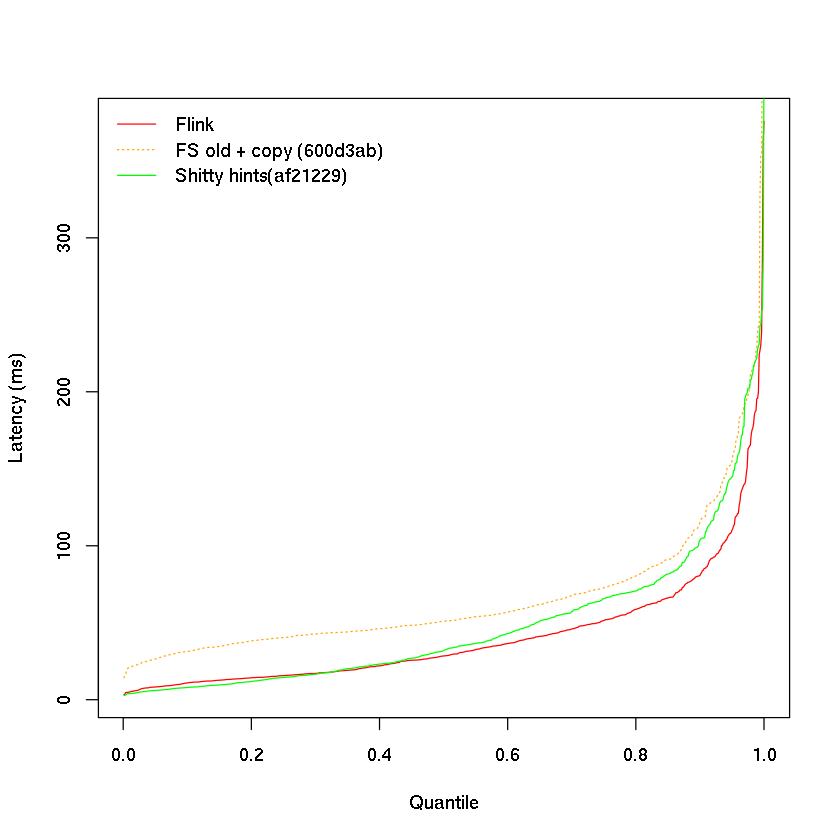

In [34]:
quntiles.1000 <- seq(1, length(fl)) / length(fl)
quntiles.10000 <- seq(1, length(fs.buffer.acks.10k)) / length(fs.buffer.acks.10k)
plot(quntiles.1000, sort(fl), type = "l", col = "red",  xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles.1000, sort(fs.old.copy), col = "orange", lty=3)
lines(quntiles.1000, sort(fs.af21229), col = "green")
legend(
    "topleft", 
    legend = c("Flink", "FS old + copy (600d3ab)", "Shitty hints(af21229)"), 
    col = c("red", "orange", "green"),
    lty = c(1, 3, 1, 1),
    bty = "n",
    text.col = "black"
)

In [35]:
bars <- function(a, b, col.names = c("FlameStream", "Flink")) {
    m <- matrix(c(quantile(a, p = 0.5),
        quantile(a, p = 0.95) - quantile(a, p = 0.5),
        quantile(a, p = 0.99) - quantile(a, p = 0.95),
        quantile(b, p = 0.5),
        quantile(b, p = 0.95) - quantile(b, p = 0.5),
        quantile(b, p = 0.99) - quantile(b, p = 0.95)), nrow=3)
    colnames(m) <- col.names
    rownames(m) <- c("50%", "95%", "99%")
    barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
    legend("bottomright",
           title = "Quantiles",
           legend = c("50%", "95%", "99%"), 
           fill = c("grey20", "grey50", "grey80"))
}

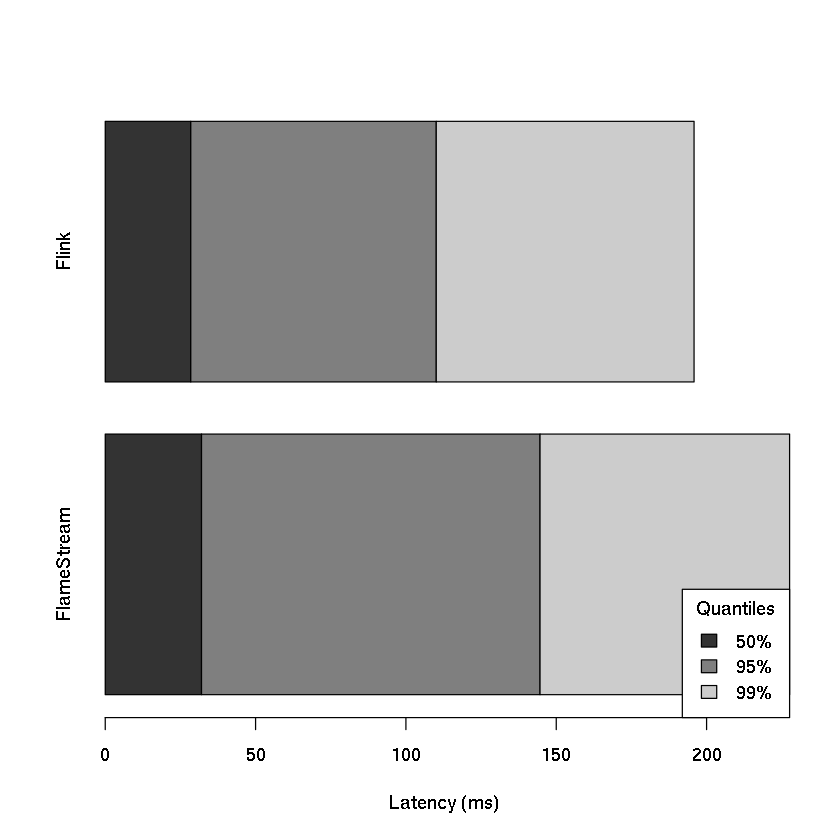

In [15]:
bars(fs.async, fl)

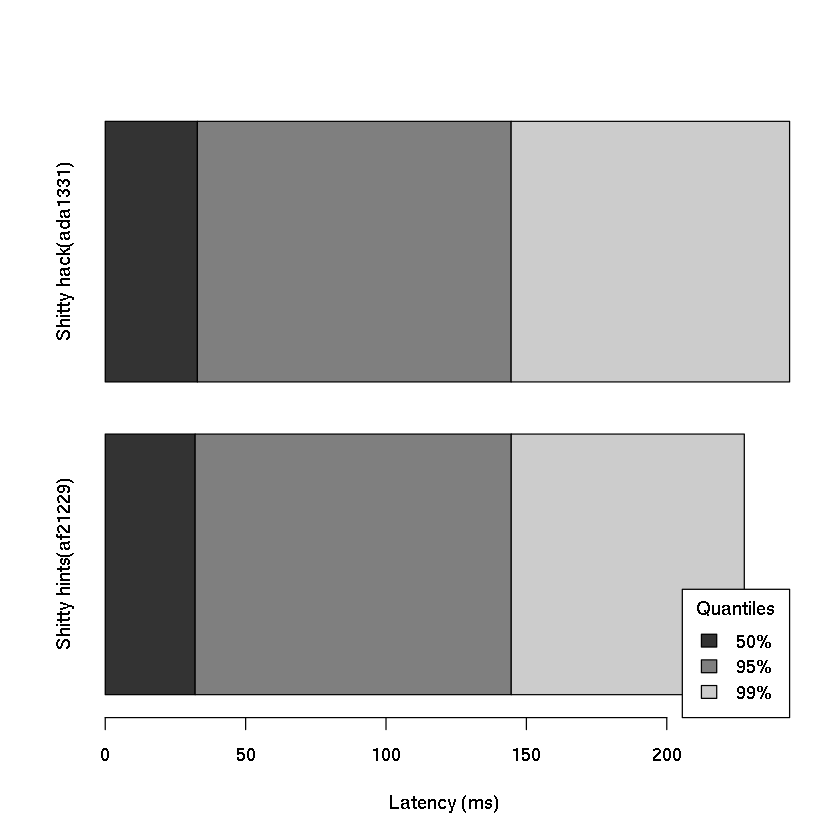

In [37]:
bars(fs.af21229, fs.ada1331, c("Shitty hints(af21229)", "Shitty hack(ada1331)"))

In [39]:
t.test(fs.af21229, fs.ada1331, paired = T)


	Paired t-test

data:  fs.af21229 and fs.ada1331
t = -5.1585, df = 799, p-value = 3.142e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.534139 -1.137135
sample estimates:
mean of the differences 
              -1.835637 


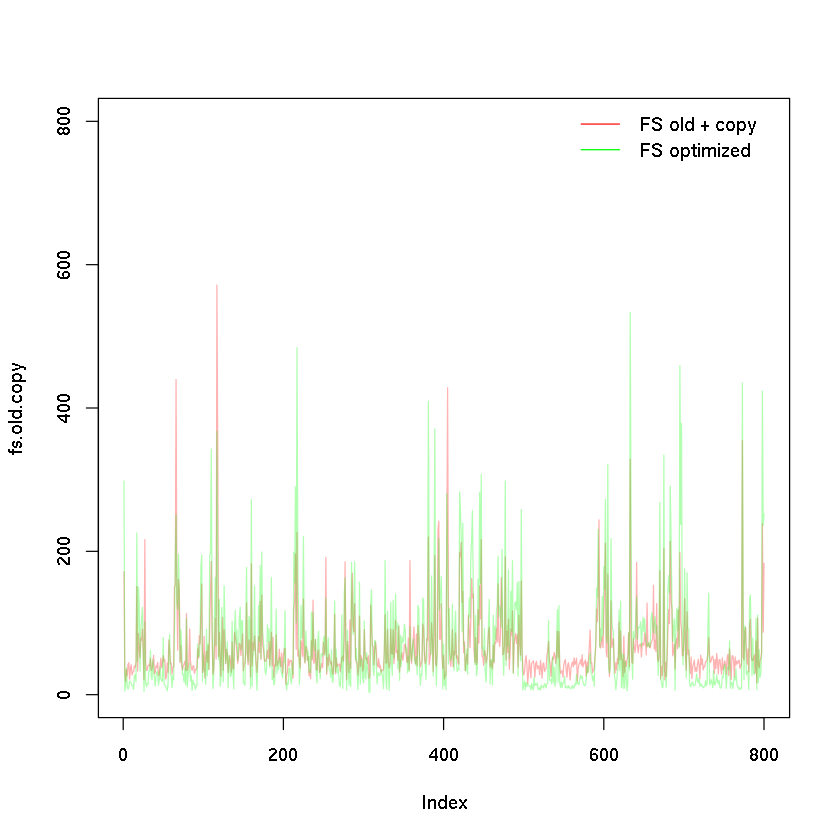

In [26]:
plot(fs.old.copy, t="l", ylim=c(0, 800), col=rgb(1,0,0,0.3))
lines(fs.buffer.acks, t="l", ylim=c(0, 800), col=rgb(0,1,0,0.3))
legend(
    "topright", 
    legend = c("FS old + copy", "FS optimized"), 
    col = c("red", "green"),
    lty = c(1, 1),
    bty = "n",
    text.col = "black"
)